

# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This report is based on data analysis of 10,000 movies taken from The Movie Database (TMDb) [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv?embedded=True) and cleansed from the original Kaggle data. This research tracks the correlations between movie popularity, genre, and duration, indicating categories with underlying income growth potential. The goal of this research is to examine the hypothesis that raising a film's production budget will improve its overall income. The data, which includes movie titles, genres, gross revenues, audience popularity, and other factors, is provided in 21 distinct columns:
1.	Id – is the case id
2.	imdb_id – is the unique IMDb identification number
3.	popularity – the popularity the movie gained after the release
4.	budget – the expenses that went into the production of the movie
5.	revenue – the income accrued from the sales of movies
6.	original_title – the name the movie was released with
7.	cast – major actors and actresses in the movie 
8.	homepage – the main website providing information about the movie
9.	director – the person who directed the movie
10.	tagline – a phrase providing a snap description of the movie
11.	keywords – keywords connected to the movie that can be used to search the movie 
12.	overview – a brief synopsis of the movie
13.	runtime – the total duration of the movie
14.	genres – the categories that define films based on narrative or stylistic elements
15.	production_companies – companies that produced the movies
16.	release_date – the date the movie was released
17.	vote_count – number of votes gathered from viewers of the movie
18.	vote_average – average vote cast per movie
19.	release_year – the year the movie was released
20.	budget_adj – the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time
21.	revenue_adj – the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time





### Question(s) for Analysis

*The analysis will be performed to answer the following quesions:*

**Que. 1 - Which year have the most movies released?**

**Que. 2 - Which month(s) of the year is best to release movies?**

**Que. 3 - What is the correlation between the popularity of movies and profitability?**

**Que. 4 - What are the top 10 movie genres?**

#### Importing libraries

For this activity, the following will be imported and used: numpy, pandas, matplotlib and seaborn.

In [1]:
# importing libraries to be used in the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling

In this section of the report, the data will be loaded, check for cleanliness, and then trim and clean your dataset for analysis.

## General Properties

   The dataset for this analysis comes in csv format with filename: tmdb-movies.csv. It contains over 10,000 rows and 21 columns of information on movies released between 1960 and 2015. 

In [2]:
# i will load the data to be used in the analysis and take a peek into it
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# having glimpse of how the data is structured
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# taking a look at the number of rows and columns the dataset consist of

df.shape

(10866, 21)

The dataset contains 10,886 rows (enteries) and 21 columns

In [5]:
# determining the information associated with the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The columns cast, homepage, director, tagline, keywords, overview and production_companies are having missing enteries. Since these variables are neither float nor int, the missing enteries will not be filled with the means of respective column enteries.
The 

In [6]:
# here i perform a descriptive summary statistics of the sample dataset 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

**This section deals with the steps involved in cleaning the dataset before actual analysis was initiated.**

### Removing (unwanted) columns

The following columns: imdb_id, cast, homepage, director, tagline, keywords, overview and production_companies will not be used in the subsequent analysis, will be droped from the dataset.

In [7]:
# dropping columns that wont be used in the analysis
df.drop(['id','imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [8]:
# checking the dataframe to comfirm drop columns has been executed
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The **'unwanted'** columns have removed from the dataset as depicted in out above.

### Dealing with missing values in the dataset

I will be using the column 'genres' in my analysis and it has 23 rows with missing enteries. So I will have a looking at these entries to determine whether or not excluding them will affect the analysis of the dataset

In [9]:
# looking for the rows with missing entries under the column genres
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


The **23 rows** with missing enteries under the genres column either have 0 recorded as budget or revenue or both, and I believe excluding them will not impact the analysis significantly. However, they do have values for other variables (columns) such as 'popularity', 'vote_count' and others that the analysis might depend on. And because of this reason I will not exclude these missing rows from the dataset, but classify them as **'missing'** under the genres column.

In [10]:
# filling rows with missing entries under the genres column as missing
df.genres = df.genres.fillna('missing')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10866 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


Now all the remaining columns have equal entries as the **NaN** under the genres column were filled with **missing**.

### Dealing with duplicates
At this point I will look for duplicated entries in the dataset.
Since the dataset is large and will be difficult to find duplicates individually, I will check for the total number of duplicates in the entire dataset.

In [12]:
# looking for the total number of duplicated rows in the dataset.
sum(df.duplicated())

1

Per the output of the preceeding cell, 1 duplicate exist in the dataset. I will drop the duplicate from the dataset.

In [13]:
# dropping duplicated row in the dataset.
df.drop_duplicates(inplace=True)

In [14]:
# confirming drop of duplicated row in the dataset.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool

In [15]:
sum(df.duplicated())

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10865 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


One row (duplicate) has been dropped leaving the total rows to be 10,865. Therefore, all the remaining columns have equal entries.

<a id='eda'></a>
# Exploratory Data Analysis

**This section entails the explorations I performed on the dataset in order to answer initial questions posed.**


### Que. 1 - Which year have the most movies released?

#### Determining the total number of movies release per year

In [17]:
# determing the counts of movies per year, I will use the value count function is pandas
year_count = df.release_year.value_counts()
year_count

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

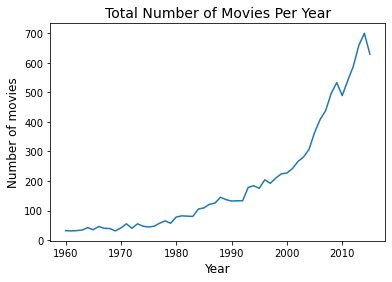

In [18]:
sns.lineplot(x=year_count.index, y=year_count.values)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.title('Total Number of Movies Per Year', fontsize=14)
plt.savefig('totalmoviesyear');

### **Findings**

It is determined that dataset took into consideration movies released between the period 1960 and 2015. Over the period, the movie industry saw an increase in the number of movies released per year. The year 2015 saw the highest number of movie released (700), while the least number of movies release (31) was recorded for 196l and 1969 each.

### Que. 2 - Which month(s) of the year is best to release movies?

#### Extracting months from the date of release column

For the analysis purpose, I will need the **Months** in which movies were released and the dataset did have a column for that. I will therefore extract the months of movies release from the **release_date** column, which has date type as object. I will extract months from the date into a new coloumn using pandas DatetimeIndex function.

In [19]:
# using DatetimeIndex function to change release_date column date type from object to date
new_release_date = pd.DatetimeIndex(df['release_date'])
new_release_date

DatetimeIndex(['2015-06-09', '2015-05-13', '2015-03-18', '2015-12-15',
               '2015-04-01', '2015-12-25', '2015-06-23', '2015-09-30',
               '2015-06-17', '2015-06-09',
               ...
               '2066-02-16', '2066-06-10', '2066-05-25', '2066-10-05',
               '2066-05-20', '2066-06-15', '2066-12-21', '2066-01-01',
               '2066-11-02', '2066-11-15'],
              dtype='datetime64[ns]', name='release_date', length=10865, freq=None)

Now the release_date column has been converted from object to date. I will now extract month from the new_release_date column created.

In [20]:
df['Month'] = new_release_date.month

In [21]:
df.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4


I now have a new column **Month** in the dataframe and it has months in numerical form. I will use apply function to assign name to the months. For easy manipulation name of months will be prefixed 01 to 12 per month, e.g. January now becomes 01-January. 

In [22]:
# using the apply function to categorise and assign names to months of the year

def categorise(row):  
    if row['Month'] == 1:
        return '01-January'
    elif row['Month'] == 2:
        return '02-February'
    elif row['Month'] == 3:
        return '03-March'
    elif row['Month'] == 4:
        return '04-April'
    elif row['Month'] == 5:
        return '05-May'
    elif row['Month'] == 6:
        return '06-June'
    elif row['Month'] == 7:
        return '07-July'
    elif row['Month'] == 8:
        return '08-August'
    elif row['Month'] == 9:
        return '09-September'
    elif row['Month'] == 10:
        return '10-October'
    elif row['Month'] == 11:
        return '11-November'
    return '12-December'
df['month_name'] = df.apply(lambda row: categorise(row), axis=1)

In [23]:
# displaying dataframe head to confirm the implemented changes
df.head(3)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month,month_name
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,06-June
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,05-May
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,03-March


*I now have a new column titled **'month_name'** which contain the new formated names of months.* 

#### Total Number of Released Movies per Month
Determing the total number of movies released per month over the period.

In [24]:
# the value count function will be used to determine the total number of movies per year 
# from the first to last month of the year

month_count = df.month_name.value_counts().sort_index()
month_count

01-January       919
02-February      691
03-March         822
04-April         797
05-May           809
06-June          827
07-July          799
08-August        918
09-September    1331
10-October      1153
11-November      814
12-December      985
Name: month_name, dtype: int64

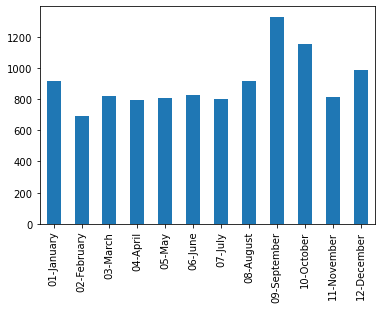

In [25]:
# ploting a bar charts for the monthly distribution of total number released movies

month_count.plot.bar();

### **Findings**

By numbers, September is the month with the most movies release, followed in decreasing order by October, December and June. February is month with the least number of movies release.

 

#### **Most profetable month of the year**

To determine this, the difference between the adjusted revenue (revenue_adj) and adjusted budget (budget_adj) per each movie will be calculated into a new column **'profit'**.

In [26]:
# to determine the profit, revenue_adj - budget_adj = profit
df['profit'] = df['revenue_adj'].sub(df['budget_adj'], axis=0)

In [27]:
# displaying the fisrt 5 rows in the dataframe head to check for the implemented changes 
df.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month,month_name,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,06-June,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,05-May,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,03-March,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,12-December,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4,04-April,1.210949e+09


Looking at the dataframe, the new column titled 'profit' has been added.

#### Determining the Profitable Month

To determine the month that is most profitable in terms of overall profit and mean profit, the groupby function will be used in this analysis.

In [28]:
# To determine the month that is most profitable by the overall (total) profit, the groupby function will be used.

monthly_profit = df.groupby('month_name').agg(profit_by_month = ('profit', 'sum'))
monthly_profit

,profit_by_month
month_name,
01-January,1.024516e+10
02-February,1.268974e+10
03-March,2.685383e+10
04-April,1.935477e+10
05-May,4.302995e+10
06-June,5.816358e+10
07-July,4.024420e+10
08-August,1.940395e+10
09-September,1.630338e+10


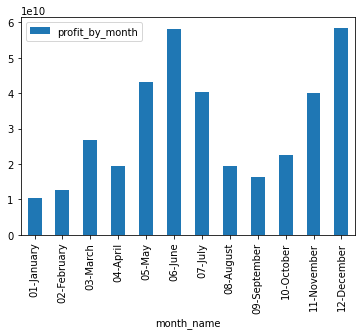

In [29]:
# plotting a bar chart profit (overall) by months for period

monthly_profit.plot.bar();

In [30]:
# To determine the month that is most profitable by mean, the groupby function will be used.

mean_monthly_profit = df.groupby('month_name').agg(profit_by_month = ('profit', 'mean'))
mean_monthly_profit

,profit_by_month
month_name,
01-January,1.114817e+07
02-February,1.836432e+07
03-March,3.266890e+07
04-April,2.428453e+07
05-May,5.318907e+07
06-June,7.033081e+07
07-July,5.036820e+07
08-August,2.113720e+07
09-September,1.224897e+07


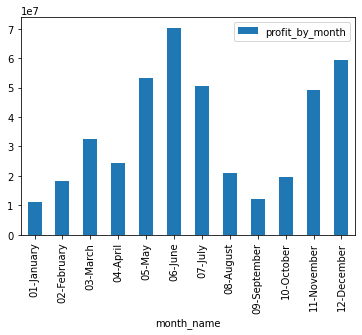

In [31]:
# plotting a bar chart profit (mean) by months for period

mean_monthly_profit.plot.bar();

### **Findings**

Comparing the share of profits by months using the overall profit and mean profit of months, June, December, May and July, were the top 4 months that recorded that highest profits in the descending order. On the other hand, the January happens to be the month with the lowest profit.


### Que. 3 - What is the correlation between the popularity of movies and profitability?

### Movie Popularity

Determing movie popularity by months, and the correlation between profit and movie popularity.

In [32]:
# to determine the months which saw the release of popular movies, the group by function will be used group months 
# per the mean popularity ratings

monthly_pop = df.groupby('month_name').agg(popularity_by_month = ('popularity', 'mean'))
monthly_pop

,popularity_by_month
month_name,
01-January,0.460574
02-February,0.589931
03-March,0.642808
04-April,0.562475
05-May,0.749997
06-June,0.800755
07-July,0.747678
08-August,0.584363
09-September,0.564820


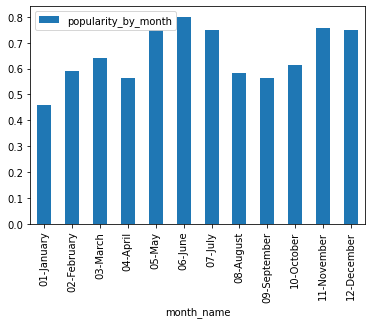

In [33]:
# plotting a bar chart of popularity of movies per month

monthly_pop.plot.bar();

### **Findings**

By average of the popularity rating of the movies for the months, movies released between May and July, and November and December had higher averages of popularity among audience.

#### Correlation between profit and movie popularity

In [34]:
# to determine the coefficient of correlation between movie popularity and profit the .corr function will be used

profit_popularity_corr = df['popularity'].corr(df['profit'])
profit_popularity_corr

0.5628384633779516

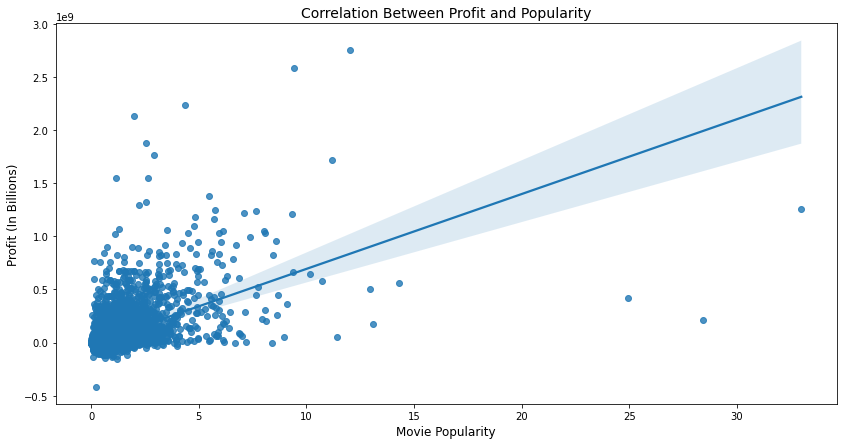

In [35]:
# plotting a scatter plot of popularity against profit using seaborn plot function.
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='popularity', y='profit', data=df)
plt.xlabel('Movie Popularity', fontsize=12)
plt.ylabel('Profit (In Billions)', fontsize=12)
plt.title('Correlation Between Profit and Popularity', fontsize=14)
plt.savefig('CorrProfitPopularity');

**Findings**

There is a moderate positive correlation with a coefficient of correlation value of 0.56 between profit and the popularity of a movie. The trend line in the plot above is positive which indicates popular movies are likely to have higher profits.

### Que. 4 - What are the top 10 movie genres?

#### **Top ten movie genres** 

The top 10 movie genre by numbers will be determine in this section.

In [36]:
# determining the top 10 genres using value count and the result will be set to display them is descending order. 

genre_count = df.genres.value_counts()

# limiting results to first 10 in descending order 
top10_genres = genre_count[:10]

# displaying the top 10 movies genres by numbers
top10_genres

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

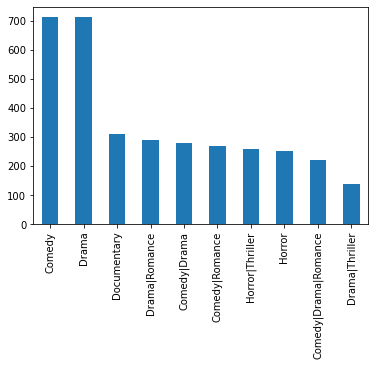

In [37]:
# ploting a bar chart of the top 10 genres by numbers

top10_genres.plot.bar();

## **Findings**


By numbers, the top 10 movie genres are Comedy, Drama, Documentary, Drama|Romance, Comedy|Drama, Comedy|Romance, Horror|Thriller, Horror, Comedy|Drama|Romance and Drama|Thriller. Among the top 10, the Comedy and Drama genres share top 2 with 712 movies each for the period.

#### **Top 10 Movies Genres By Profit Percentage**

Here, I will determine the profit percentage shares of the Top 10 genres.

In [38]:
# to determine the share of profit percentage in 2 decimal places by each genres, the groupedby function will be used
# and show on the Top 10 genres

percent_genre = df.groupby(['genres'],  as_index=False)['profit'].sum().sort_values(by='profit', ascending=False)
percent_genre['Profit Percentage'] = (percent_genre['profit']/percent_genre['profit'].sum()*100).round(2)
percent_genre[:10]
gen_profit_per = percent_genre[:10]
gen_profit_per

,genres,profit,Profit Percentage
686,Comedy,1.716410e+10,4.67
984,Drama,1.376784e+10,3.75
847,Comedy|Romance,1.047115e+10,2.85
392,Adventure|Action|Thriller,9.070750e+09,2.47
390,Adventure|Action|Science Fiction,8.365912e+09,2.28
766,Comedy|Drama|Romance,7.600808e+09,2.07
513,Adventure|Fantasy|Action,6.557370e+09,1.78
1195,Drama|Romance,5.860265e+09,1.59
549,Adventure|Fantasy|Family,5.487351e+09,1.49
643,Animation|Family,5.230636e+09,1.42


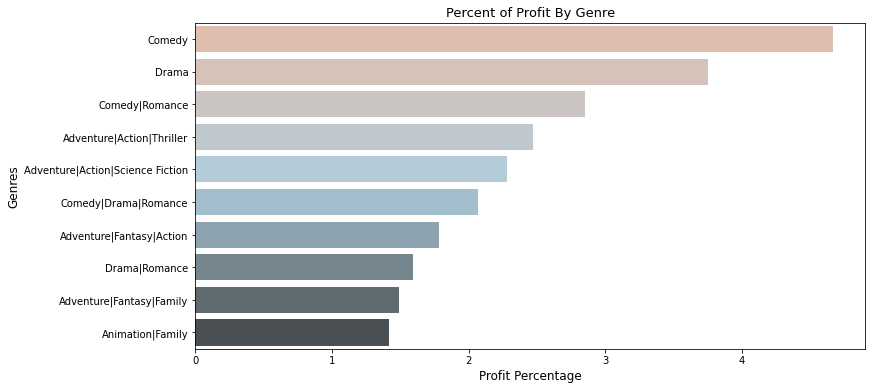

In [39]:
# ploting horizontal bar charts of the top 10 movie genres by profit percentage

plt.figure(figsize=(12,6))
ax6 = sns.barplot(x=gen_profit_per['Profit Percentage'], y=gen_profit_per['genres'], palette='RdBu_d')
plt.xlabel('Profit Percentage', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Percent of Profit By Genre', fontsize=13)
plt.savefig('profitpercentage');

## **Findings**

The figure above depicts the top 10 genres by share of profit percentage. From the analysis, Comedy (4.67%) and Drama (3.75%) are the two topmost genres with the highest percentages in terms of profits.

<a id='conclusions'></a>
# Conclusions


After analysing the information on movies from the TMDb, the following conclusions can be drawn. 

Over the period between 1960 and 2015, the number of movies released has been increasing, and September is the month with the most movies released, followed in decreasing order by October, December and June. 
Comparing the share of profits by months, June, December, May and July, are the top 4 months with the highest profits in descending order.

Movies turn out to be popular when released between May and July, and November and December. A moderate positive correlation was found between profit and the popularity of a movie.

It is recommended to movie makers to target the release of their movies in around the summer period of the year and also November and December, as these periods tend to have most movie watchers being on vacations or holidays.

The top 10 movie genres by number are Comedy, Drama, Documentary, Drama & Romance, Comedy & Drama, Comedy & Romance, Horror & Thriller, Horror, Comedy & Drama & Romance and Drama & Thriller.

Among the top 10, Comedy and Drama are the two topmost genres with the highest percentages in terms of profits. It is recommended to movie makers to target the releasing movies in these genres to share in genres profitability successes.

The findings of this analysis is tentaive as the currency of funds (budget and revenue) was specified. Also, this limited analysis to significant associations were not performed. Therefore, caution must be taken when extrapolations are made based on this findings.

# References / Materials Consulted

1. O'Reilly - Python for Data Analysis (2nd Ed.) (2018) by Wes McKinney.
2. Al Sciences - Data Analysis from Scratch with Python (2016) by Peters Morgan.
3. (https://medium.datadriveninvestor.com/data-science-analysis-of-movies-released-in-the-cinema-between-2000-and-2017-b2d9e515d032)
4. (https://datatofish.com/bar-chart-python-matplotlib/)
5. (https://www.youtube.com/watch?v=fNzUhp5uHFY)